In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


AttributeError: 'Rectangle' object has no property 'normed'

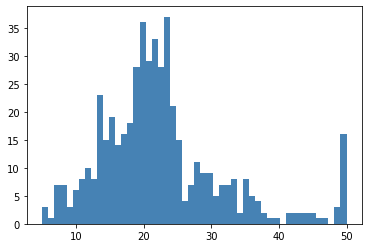

In [ ]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['MEDV'] = boston.target
dataset.describe()
plt.hist(dataset['MEDV'], bins=50, color='steelblue', normed=True )

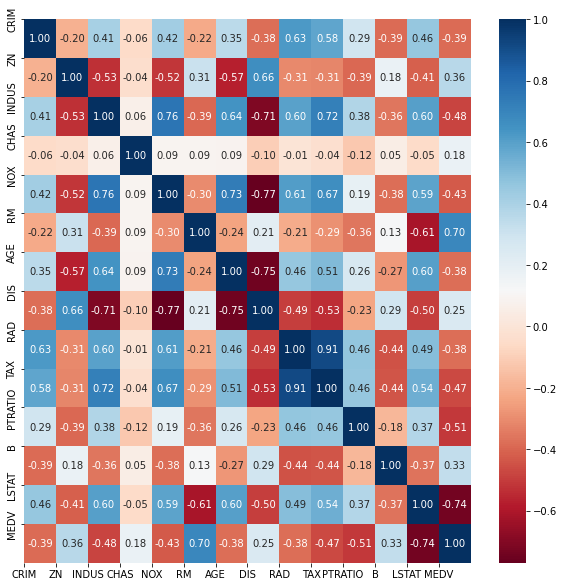

In [ ]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [ ]:
#划分训练集与测试集
X = dataset.iloc[:, 0:13].values

y = dataset.iloc[:, 13].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
#训练模型
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)

regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
#评估
from sklearn.metrics import r2_score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

print('CV: ', cv_rf.mean())

print('R2_score (train): ', r2_score_rf_train)

print('R2_score (test): ', r2_score_rf_test)

print("RMSE: ", rmse_rf)

CV:  0.8182509664876496
R2_score (train):  0.9768407108850092
R2_score (test):  0.8637486208767902
RMSE:  3.204057971213175


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb7a4637-5c36-407a-9ebe-aede8aeb0e75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>